# Alzheimers Disease Prediction

## Comparitative Analysis of Various Machine Learning Algorithms 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare

In [2]:
## Read the dataset
df = pd.read_csv('oasis_longitudinal.csv')

## Display the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [3]:

# COL	Description
# EDUC	Years of Education
# SES	Socioeconomic Status
# MMSE	Mini Mental State Examination
# CDR	Clinical Dementia Rating
# eTIV	Estimated Total Intracranial Volume
# nWBV	Normalize Whole Brain Volume
# ASF	Atlas Scaling Factor

print("Total No of Rows and Columns (Rows,Columns) : ",df.shape)
df.head(10)

Total No of Rows and Columns (Rows,Columns) :  (373, 15)


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [4]:
# Statisitical Analysis of the Dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
#No of rows and columns containing null values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
# No of duplicate entries
sum(df.duplicated())

0

C:\Users\visin\AppData\Local\Temp\ipykernel_18924\4089063469.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])


<Axes: xlabel='Group', ylabel='count'>

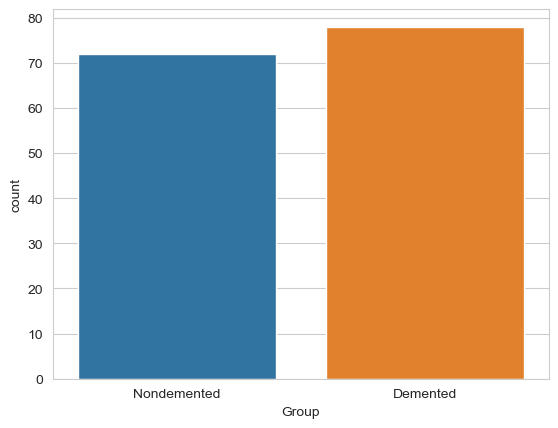

In [7]:
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)
ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

In [8]:
# Socio Economic Status (SES) and Mini Mental State Examination (MMSE) contains null vallues
# Fill these null values with mean and median values 
columns=['Visit','MR Delay','Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF']
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

In [9]:
# Mean Values of the variables
print("Mean:")
df[columns].mean()

Mean:


Visit          1.882038
MR Delay     595.104558
Age           77.013405
EDUC          14.597855
SES            2.436997
MMSE          27.342318
CDR            0.290885
eTIV        1488.128686
nWBV           0.729568
ASF            1.195461
dtype: float64

In [10]:
# Median Values of the variables
print("Median: ")
df[columns].median()

Median: 


Visit          2.000
MR Delay     552.000
Age           77.000
EDUC          15.000
SES            2.000
MMSE          29.000
CDR            0.000
eTIV        1470.000
nWBV           0.729
ASF            1.194
dtype: float64

In [11]:
# Mode Values of the variables
print("Mode: ")
df[columns].mode()

Mode: 


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1.0,0.0,73.0,12.0,2.0,30.0,0.0,1475,0.696,1.184
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1483,NaN,1.190


In [12]:
# F Test (ANOVA Analysis)

# 'Group' is the categorical column (Demented, Non-demented) 
# and 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF' are your numerical columns

# Perform one-way ANOVA for each numerical column
for column in ['EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']:
    fvalue, pvalue = stats.f_oneway(df[column][df['Group'] == 'Demented'],
                                    df[column][df['Group'] == 'Nondemented'])
    print(f'\n{column}:')
    print('F-value:', fvalue)
    print('P-value:', pvalue)


EDUC:
F-value: 14.363340378678462
P-value: 0.0001758168534161567

SES:
F-value: 0.5613890211892039
P-value: 0.45417592604752366

MMSE:
F-value: 139.9122475208685
P-value: 1.3055397816422808e-27

CDR:
F-value: 569.0991477380047
P-value: 6.612170536592266e-77

eTIV:
F-value: 0.6776605213623791
P-value: 0.41092230589909595

nWBV:
F-value: 39.823723790966966
P-value: 7.929310036168454e-10

ASF:
F-value: 0.3921647150641193
P-value: 0.5315488199521303


In [13]:
# Perform t-test for each numerical column
for column in ['EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']:
    group1 = df[column][df['Group'] == 'Demented']
    group2 = df[column][df['Group'] == 'Nondemented']
    
    t_statistic, p_value = stats.ttest_ind(group1, group2, nan_policy='omit')
    
    print(f'\n{column}:')
    print('t-statistic:', t_statistic)
    print('P-value:', p_value)


EDUC:
t-statistic: -3.7898997847803924
P-value: 0.00017581685341612

SES:
t-statistic: 0.7492589813870791
P-value: 0.45417592604762524

MMSE:
t-statistic: -11.828450765880907
P-value: 1.3055397816419847e-27

CDR:
t-statistic: 23.855799037927977
P-value: 6.612170536590057e-77

eTIV:
t-statistic: -0.8232013856659703
P-value: 0.4109223058992074

nWBV:
t-statistic: -6.310604074965205
P-value: 7.929310036165063e-10

ASF:
t-statistic: 0.6262305606277304
P-value: 0.531548819952214


In [14]:
# Chi-Square Test for Indepependence 

# Create a contingency table
contingency_table = pd.crosstab(df['Group'], df['M/F'])

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(contingency_table)

M/F            F   M
Group               
Demented      84  99
Nondemented  129  61


In [15]:
print('Chi-square statistic:', chi2)
print('P-value:', p_value)

Chi-square statistic: 17.520255064172538
P-value: 2.8426311943273562e-05


In [16]:

# Assuming df is your DataFrame and 'Group' is your categorical column

# Get observed frequencies
observed = df['Group'].value_counts()

# Define expected frequencies (assuming equal distribution)
expected = [len(df)/len(observed) for _ in range(len(observed))]

# Perform Chi-square test
chi2, p = chisquare(observed, f_exp=expected)

# Create a DataFrame for observed and expected frequencies
freq_df = pd.DataFrame({
    'Observed': observed,
    'Expected': expected
})

print("\nObserved and Expected Frequencies:")
print(freq_df)
print("\n\n")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")



Observed and Expected Frequencies:
             Observed  Expected
Nondemented       190     186.5
Demented          183     186.5



Chi-square statistic: 0.13136729222520108
P-value: 0.7170185746915014


In [17]:
#Importing the cross-sectional CSV data from the OASIS (Alzheimers) Study: 

crossSectionalMRI = pd.read_csv("oasis_cross-sectional.csv")
crossSectionalMRI.head()



,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [18]:
#Supervised Learning Algorithms 

# 1. Linear Regression 

#Importing the Linear Regression Package from Scikit Learn.  
from sklearn.linear_model import LinearRegression 

AgeAndCDRLinearReg = LinearRegression()

#Because there are a number of NaN values in the CDR column, all of the subjects with NaN CDR values will be dropped from the following correlation. 
crossSectionalMRI.dropna(subset = ["CDR","SES","Educ","MMSE"], axis = 0, inplace = True)
crossSectionalMRI.head()

Age = crossSectionalMRI[['Age']]
CDRScores = crossSectionalMRI[['CDR']]

AgeAndCDRLinearRegModel = AgeAndCDRLinearReg.fit(Age,CDRScores)

AgeAndCDRLinearRegModel.score(Age,CDRScores)


0.09645411487921307

In [19]:
#The correlation between Age and CDR scores is actually extremely low within this sample of Alzheimer's patients. Pearson's Coefficient in this case is only ~0.09.

(0.0, 2.110898198315722)

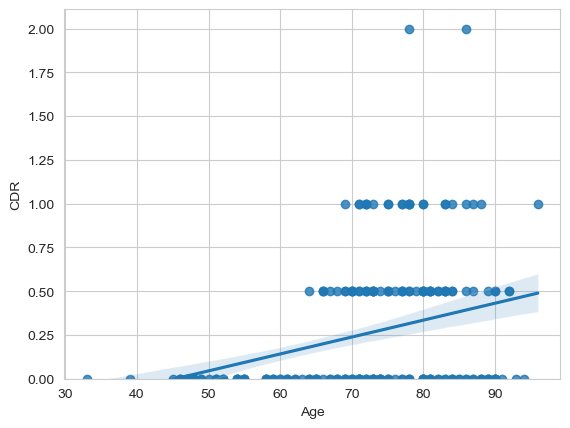

In [20]:
import seaborn as sns 
from matplotlib import pyplot as plt
sns.regplot(x='Age',y='CDR',data=crossSectionalMRI)
plt.ylim(0)

In [23]:
#2 logistic Regression
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

#Let's check the datatype of the target variable column (CDR): 
before = crossSectionalMRI.dtypes
before
#This column contains data of the type: float64. Let's change that for scikit learn compatability. 

#Let's convert the target data type to integer (as required by scikit learn): 
crossSectionalMRI['CDR'] = crossSectionalMRI['CDR'].astype(int)

#Let's check to ensure the datatype was correctly changed: 
after = crossSectionalMRI.dtypes
after

#Let's convert the Pandas dataframe above into two numpy arrays for more ease of use with scikit learn functions (train/test splitting, etc.): 
crossSectionalMRIFeatures = np.asarray(crossSectionalMRI[['Age','SES','Educ']])
crossSectionalMRITarget = np.asarray(crossSectionalMRI['CDR'])

#Next, let's split the whole dataset into training and testing sets for higher validity: 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(crossSectionalMRIFeatures, crossSectionalMRITarget, test_size=0.2, random_state=4)

#Let's build the Multiple Logistic Regression Model using the training sets 
#and compute some relevant metrics and, perhaps, make a few predictive statements: 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
crossSectionalMRILogistic = LogisticRegression(C=0.01, solver='newton-cg', multi_class='multinomial').fit(X_train,y_train)
crossSectionalMRILogistic

#Finally, let's make a few predictions using this model and the test set, as well as the probability of each of the class targets (0, 0.5, and 1 CDR Scores): 
LogisticAlzhemiersCDRScorePreds = crossSectionalMRILogistic.predict(X_test) 
LogisticAlzhemiersCDRScorePreds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
LogisticAlzheimersCDRScoreProbas = crossSectionalMRILogistic.predict_proba(X_test)
LogisticAlzheimersCDRScoreProbas

array([[9.81441259e-01, 1.80751337e-02, 4.83607193e-04],
       [8.74738536e-01, 1.15055561e-01, 1.02059032e-02],
       [9.34899838e-01, 6.16631533e-02, 3.43700831e-03],
       [8.61063290e-01, 1.25710321e-01, 1.32263892e-02],
       [8.49047224e-01, 1.39481355e-01, 1.14714213e-02],
       [9.52391258e-01, 4.53121407e-02, 2.29660159e-03],
       [8.13676723e-01, 1.68795893e-01, 1.75273840e-02],
       [8.73273081e-01, 1.14104347e-01, 1.26225714e-02],
       [8.20125803e-01, 1.63020561e-01, 1.68536360e-02],
       [9.62355122e-01, 3.59723845e-02, 1.67249389e-03],
       [8.73589296e-01, 1.14096403e-01, 1.23143017e-02],
       [8.82863566e-01, 1.09138265e-01, 7.99816832e-03],
       [9.54369797e-01, 4.34890902e-02, 2.14111302e-03],
       [8.17900895e-01, 1.66638461e-01, 1.54606435e-02],
       [8.84362840e-01, 1.06705978e-01, 8.93118242e-03],
       [8.90501431e-01, 1.00402537e-01, 9.09603225e-03],
       [9.05561305e-01, 8.80639984e-02, 6.37469710e-03],
       [9.30802294e-01, 6.57285

[[ 0  4]
 [ 0 40]]
Confusion matrix, without normalization
[[ 0  0  4]
 [ 0  0  0]
 [ 0  0 40]]


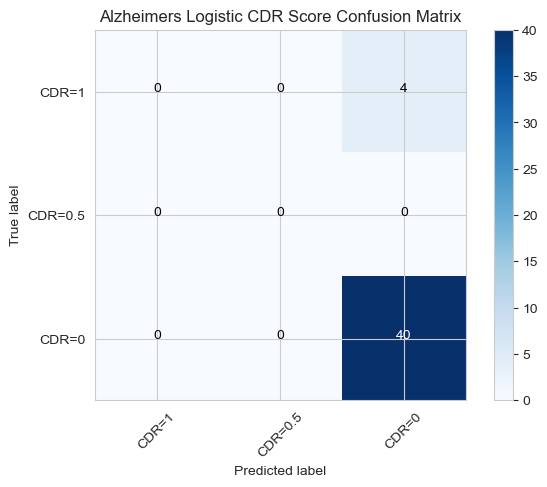

In [25]:
#Issues with logisitc model through confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

#The following chunk of code (the rest of this code cell)
#was borrowed from the Coursera IBM Professional Certificate Course on Machine Learning (Course 8):

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, LogisticAlzhemiersCDRScorePreds, labels=[1,0]))

AlzheimersLogisticConfusionMatrix = confusion_matrix(y_test, LogisticAlzhemiersCDRScorePreds, labels=[1,0.5,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(AlzheimersLogisticConfusionMatrix, classes=['CDR=1','CDR=0.5','CDR=0'], normalize= False,  title='Alzheimers Logistic CDR Score Confusion Matrix')


In [26]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [27]:
from sklearn.model_selection import train_test_split

feature_col_names = ["M/F", "Age", "EDUC", "SES", "MMSE", "eTIV", "nWBV", "ASF"]
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [29]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [30]:
total_models = ['SVC','DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [31]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier



Confusion Matrix:
[[49 11]
 [14 38]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        60
           1       0.78      0.73      0.75        52

    accuracy                           0.78       112
   macro avg       0.78      0.77      0.77       112
weighted avg       0.78      0.78      0.78       112



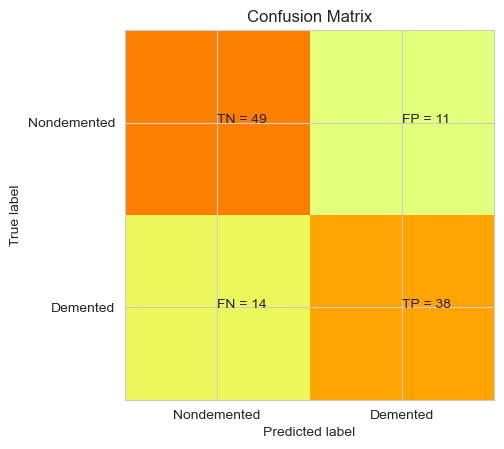

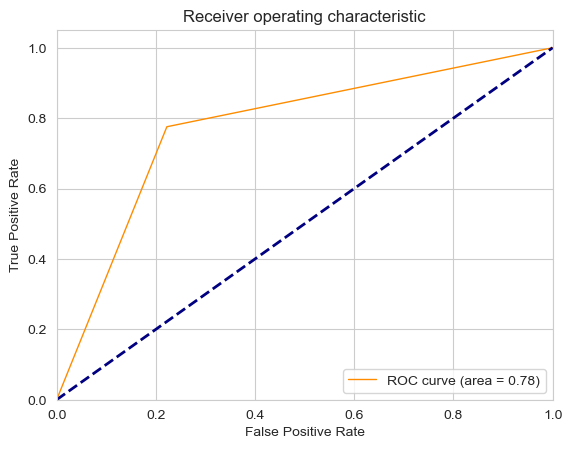


Accuracy Of the Model:  0.7767857142857143 




In [32]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)

LogisticRegression : 


Confusion Matrix:
[[42 18]
 [12 40]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        60
           1       0.69      0.77      0.73        52

    accuracy                           0.73       112
   macro avg       0.73      0.73      0.73       112
weighted avg       0.74      0.73      0.73       112



C:\Users\visin\anaconda3_\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


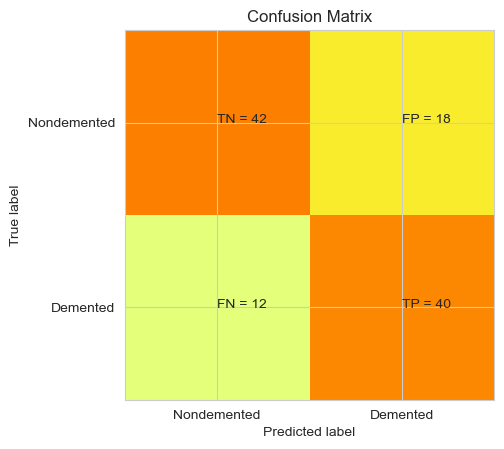

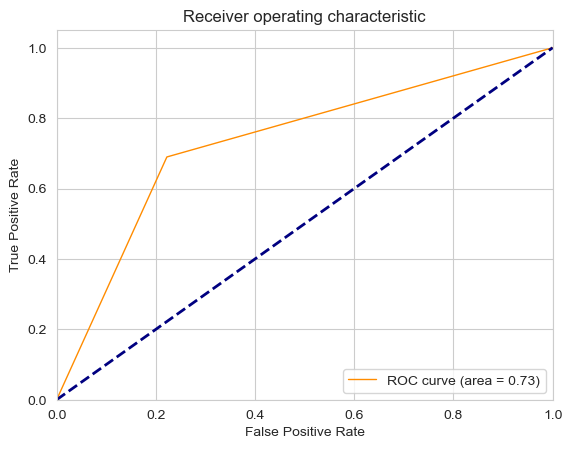


Accuracy Of the Model:  0.7321428571428571 




In [33]:
clfs =[LogisticRegression()]
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)



Confusion Matrix:
[[41 19]
 [ 6 46]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.68      0.77        60
           1       0.71      0.88      0.79        52

    accuracy                           0.78       112
   macro avg       0.79      0.78      0.78       112
weighted avg       0.80      0.78      0.78       112



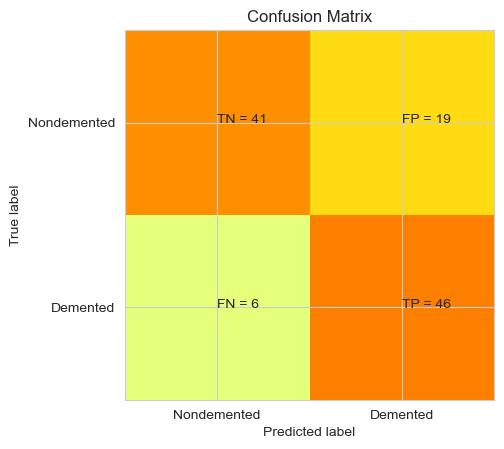

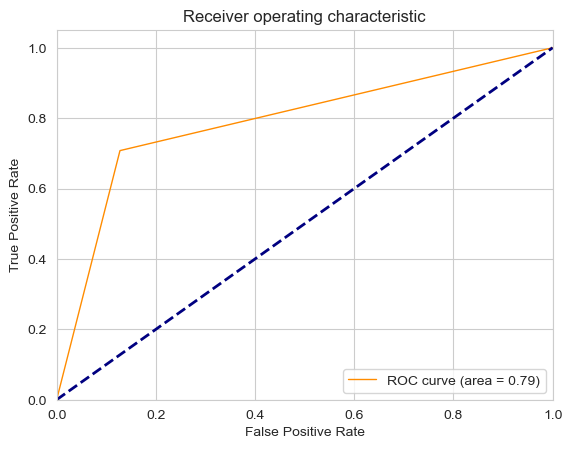


Accuracy Of the Model:  0.7767857142857143 




In [34]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)

C:\Users\visin\anaconda3_\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\visin\anaconda3_\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\visin\anaconda3_\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[49 11]
 [ 7 45]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.84        60
           1       0.80      0.87      0.83        52

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.84      0.84      0.84       112



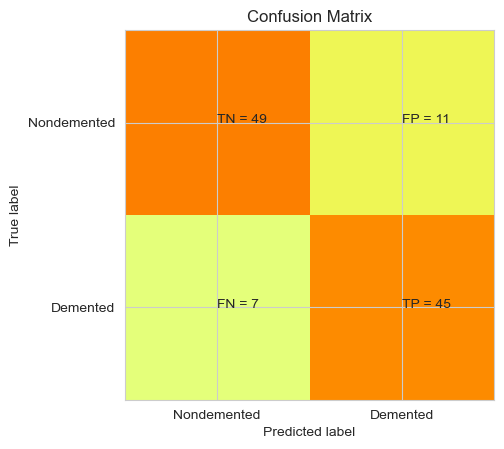

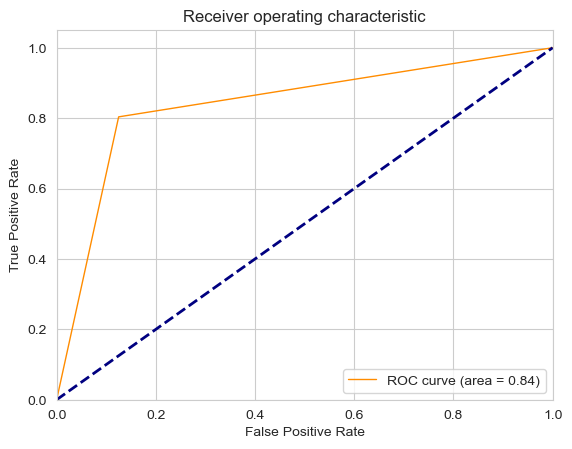


Accuracy Of the Model:  0.8392857142857143 




In [35]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)

KNeighborsClassifier : 


Confusion Matrix:
[[33 27]
 [10 42]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.55      0.64        60
           1       0.61      0.81      0.69        52

    accuracy                           0.67       112
   macro avg       0.69      0.68      0.67       112
weighted avg       0.69      0.67      0.67       112



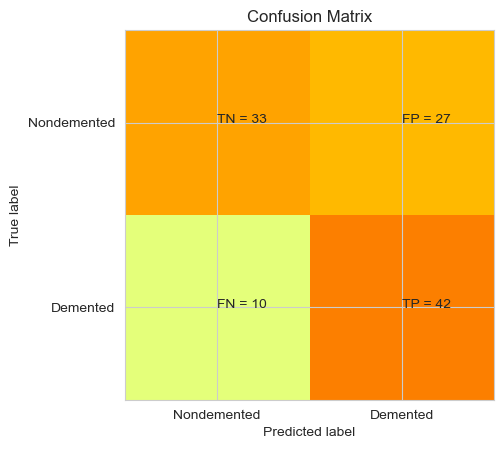

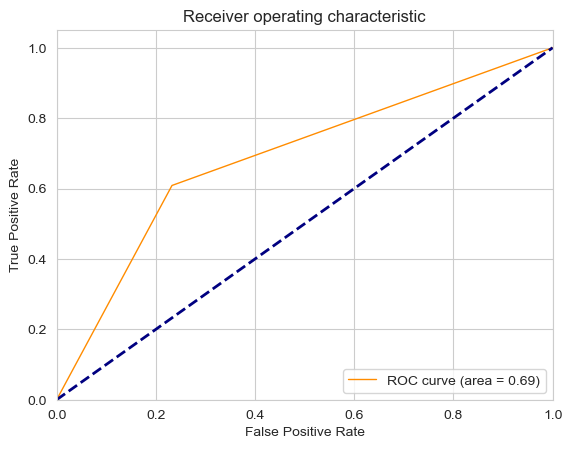


Accuracy Of the Model:  0.6696428571428571 




In [36]:

clfs =[KNeighborsClassifier()]
for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)

In [37]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your dataset
data = pd.read_csv("oasis_longitudinal.csv")  # Replace with the actual dataset file

# Data preprocessing
# Drop any rows with missing values or perform data imputation as needed
data = data.dropna()

# Select the features and target variable
X = data[['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
y = data['CDR']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)

# You can use the predictions to make Alzheimer's disease predictions.


Epoch 1/50
8/8 [==============================] - 2s 82ms/step - loss: 0.6336 - accuracy: 0.5708 - val_loss: 0.5770 - val_accuracy: 0.5263
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.5742 - accuracy: 0.6239 - val_loss: 0.5304 - val_accuracy: 0.5439
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.5034 - accuracy: 0.6372 - val_loss: 0.5023 - val_accuracy: 0.5614
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.4664 - accuracy: 0.6460 - val_loss: 0.4804 - val_accuracy: 0.5789
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.4387 - accuracy: 0.6637 - val_loss: 0.4661 - val_accuracy: 0.5965
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4135 - accuracy: 0.6637 - val_loss: 0.4580 - val_accuracy: 0.5965
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.4065 - accuracy: 0.6726 - val_loss: 0.4543 - val_accuracy: 0.5965
Epoch 8/50
8/8 [===========

In [38]:
# # Assuming your original y_test contains continuous values
# threshold = 0.5  # Define a threshold for binary classification
# binary_y_test = (y_test >= threshold).astype(int)

# # Compute the confusion matrix
# confusion = confusion_matrix(binary_y_test, predicted_labels)

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(confusion)


NameError: name 'predicted_labels' is not defined

C:\Users\visin\anaconda3_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\visin\anaconda3_\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\visin\anaconda3_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\visin\anaconda3_\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

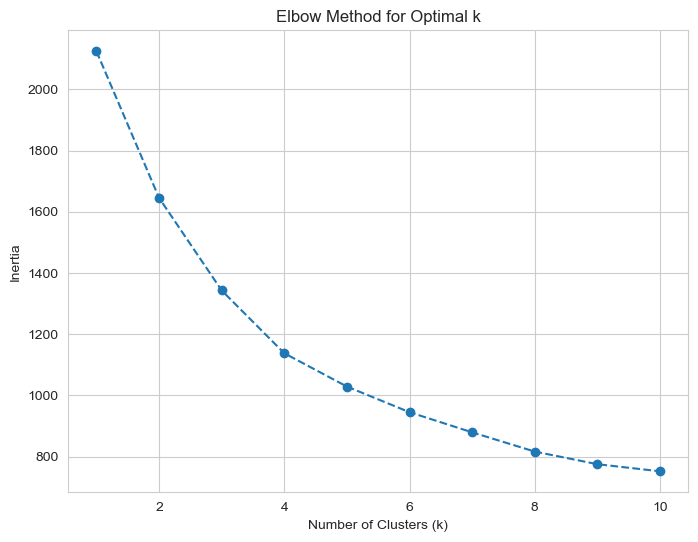

C:\Users\visin\anaconda3_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\visin\anaconda3_\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Centers:
         Age       EDUC       SES       MMSE      nWBV       ASF
0  80.141593  12.283186  3.424779  25.088496  0.707673  1.226699
1  79.161538  17.130769  1.500000  28.238462  0.715515  1.100962
2  71.378378  14.324324  2.603604  28.801802  0.769306  1.268973

Cluster Sizes:
0    113
1    130
2    111
Name: Cluster, dtype: int64


In [39]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Alzheimer's dataset
data = pd.read_csv("oasis_longitudinal.csv")

# Select relevant columns for clustering
selected_columns = ["Age", "EDUC", "SES", "MMSE", "nWBV", "ASF"]

# Remove rows with missing values
data = data.dropna(subset=selected_columns)

# Standardize the selected features
scaler = StandardScaler()
data[selected_columns] = scaler.fit_transform(data[selected_columns])

# Determine the number of clusters (k) using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[selected_columns])
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to select the optimal k
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the Elbow method, select an appropriate k (number of clusters)

# Perform k-means clustering with the chosen k
k = 3  # You can change this based on the Elbow method
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data[selected_columns])

# Explore the resulting clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=selected_columns)
cluster_sizes = data['Cluster'].value_counts().sort_index()

# Display cluster centers and sizes
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Sizes:")
print(cluster_sizes)



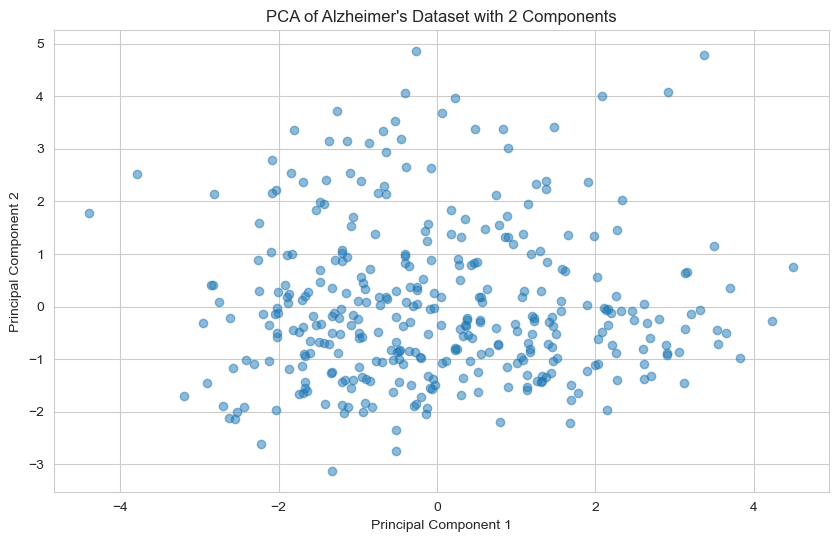

In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load the Alzheimer's dataset
data = pd.read_csv("oasis_longitudinal.csv")

# Exclude non-numeric columns like 'M/F' and 'Group'
numeric_features = data.select_dtypes(include=['int64', 'float64'])

# Drop rows with missing values (NaN)
numeric_features = numeric_features.dropna()

# Standardize the feature matrix (mean=0, variance=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Perform PCA with 2 components
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame to store the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Alzheimer\'s Dataset with 2 Components')

plt.show()